In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# import seaborn as sns
from tensorflow.keras import layers,models
import tensorflow as tf

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "brain_tumor",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
    

Found 5712 files belonging to 4 classes.


In [4]:
class_name = dataset.class_names

In [5]:
class_name

['glioma', 'meningioma', 'notumor', 'pituitary']

In [6]:
len(dataset)

179

In [7]:
179*32

5728

In [8]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy)

(32, 256, 256, 3)
<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 0, 2, 2, 3, 0, 3, 0, 3, 0, 0, 2, 0, 0, 1, 3, 1, 1, 2, 3, 2, 3,
       0, 1, 1, 0, 1, 2, 3, 3, 3, 0])>>


In [9]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [10]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


[0 2 1 3 2 1 0 0 2 2 2 1 3 3 2 1 1 2 3 3 1 2 2 3 1 0 2 3 3 0 2 2]
The len of betch is 32


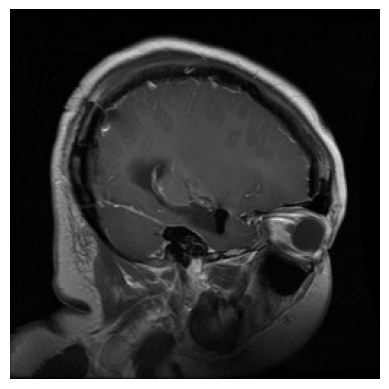

In [11]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print(label_batch.numpy())
    print("The len of betch is",len(label_batch))
    plt.axis("off")

[2 3 1 0 2 3 2 2 1 3 0 0 3 1 3 2 0 0 0 2 0 1 3 3 2 0 3 0 2 0 0 0]
The len of betch is 32


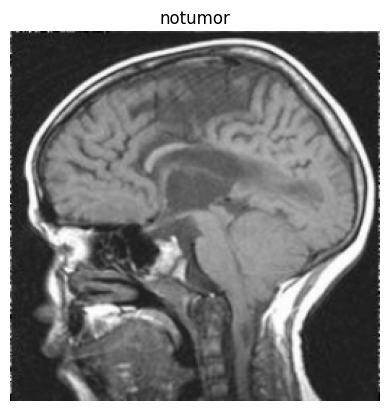

In [12]:
for image_batch,label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    print(label_batch.numpy())
    plt.title(class_name[label_batch[0]]),
    print("The len of betch is",len(label_batch))
    plt.axis("off")

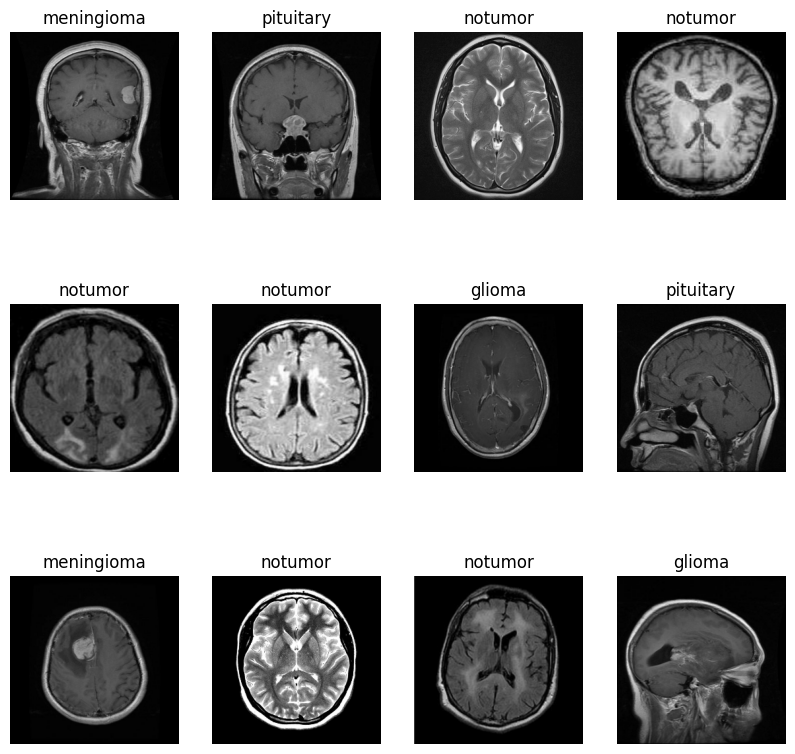

In [13]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")
    # print(class_name[label_batch[0]])

In [14]:
len(dataset)

179

In [15]:
train_size =0.8
len(dataset)*train_size

143.20000000000002

In [16]:
train_ds = dataset.take(143)
len(train_ds)

143

In [17]:
test_ds = dataset.skip(143)
len(test_ds)

36

In [18]:
val_size = 0.1
len(dataset)*val_size

17.900000000000002

In [19]:
val_ds = test_ds.take(17)
len(val_ds)

17

In [20]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,
                              shuffle_size=10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds
                              

In [21]:
get_dataset_partitions_tf(dataset)

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [22]:
len(train_ds)

143

In [23]:
len(val_ds)

17

In [24]:
len(test_ds)

36

In [25]:
len(train_ds)

143

In [26]:
# now is time do suffling and resizeing, resacle and data augmentation

In [27]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
len(train_ds),len(test_ds),len(val_ds)

(143, 36, 17)

In [29]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [30]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [31]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [35]:
tf.test.is_built_with_cuda()

False

In [37]:
EPOCH = 10

In [38]:
history = model.fit(train_ds,epochs=EPOCH,
                       batch_size=BATCH_SIZE,
                       verbose=1,
                       metrics=['accuracy']
)

Epoch 1/10
143/143 [==============================] - 139s 974ms/step - loss: 1.0113 - accuracy: 0.5551 - val_loss: 0.7129 - val_accuracy: 0.7390
Epoch 2/10
143/143 [==============================] - 136s 955ms/step - loss: 0.6954 - accuracy: 0.7312 - val_loss: 0.6737 - val_accuracy: 0.7445
Epoch 3/10
143/143 [==============================] - 137s 957ms/step - loss: 0.6210 - accuracy: 0.7646 - val_loss: 0.5267 - val_accuracy: 0.7904
Epoch 4/10
143/143 [==============================] - 137s 958ms/step - loss: 0.5435 - accuracy: 0.7850 - val_loss: 0.4718 - val_accuracy: 0.8290
Epoch 5/10
143/143 [==============================] - 137s 960ms/step - loss: 0.4943 - accuracy: 0.8114 - val_loss: 0.4321 - val_accuracy: 0.8438
Epoch 6/10
143/143 [==============================] - 137s 955ms/step - loss: 0.4692 - accuracy: 0.8208 - val_loss: 0.5825 - val_accuracy: 0.7776
Epoch 7/10
143/143 [==============================] - 137s 957ms/step - loss: 0.4307 - accuracy: 0.8328 - val_loss: 0.4856 -

In [39]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 143}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation loss')

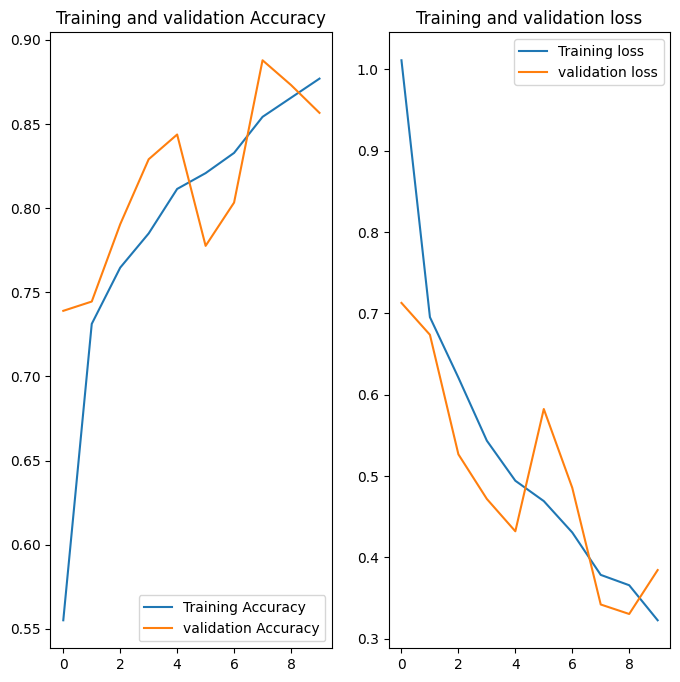

In [42]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCH),acc,label='Training Accuracy')
plt.plot(range(EPOCH),val_acc,label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCH),loss,label='Training loss')
plt.plot(range(EPOCH),val_loss,label='validation loss')
plt.legend(loc= 'upper right')
plt.title('Training and validation loss')

In [43]:
 history.history['accuracy']

[0.5550699234008789,
 0.7312062978744507,
 0.7646415829658508,
 0.7849650382995605,
 0.8114073276519775,
 0.8208041787147522,
 0.8328234553337097,
 0.8542395234107971,
 0.8656031489372253,
 0.8769667744636536]

In [47]:
models_directory = "../models"
if not os.path.exists(models_directory):
    os.makedirs(models_directory)

In [48]:
import os 
model_version = max([int(i) for i in os.listdir("../models")+[0]])+1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets


In [49]:
model.save('brain_tumor_model.h5')

C:\Users\visha\myenv\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [104]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predication = model.predict(img_array)
    predicted_class = class_name[np.argmax(predication[0])]
    confidence = round(100*(np.max(predication[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 34ms/step


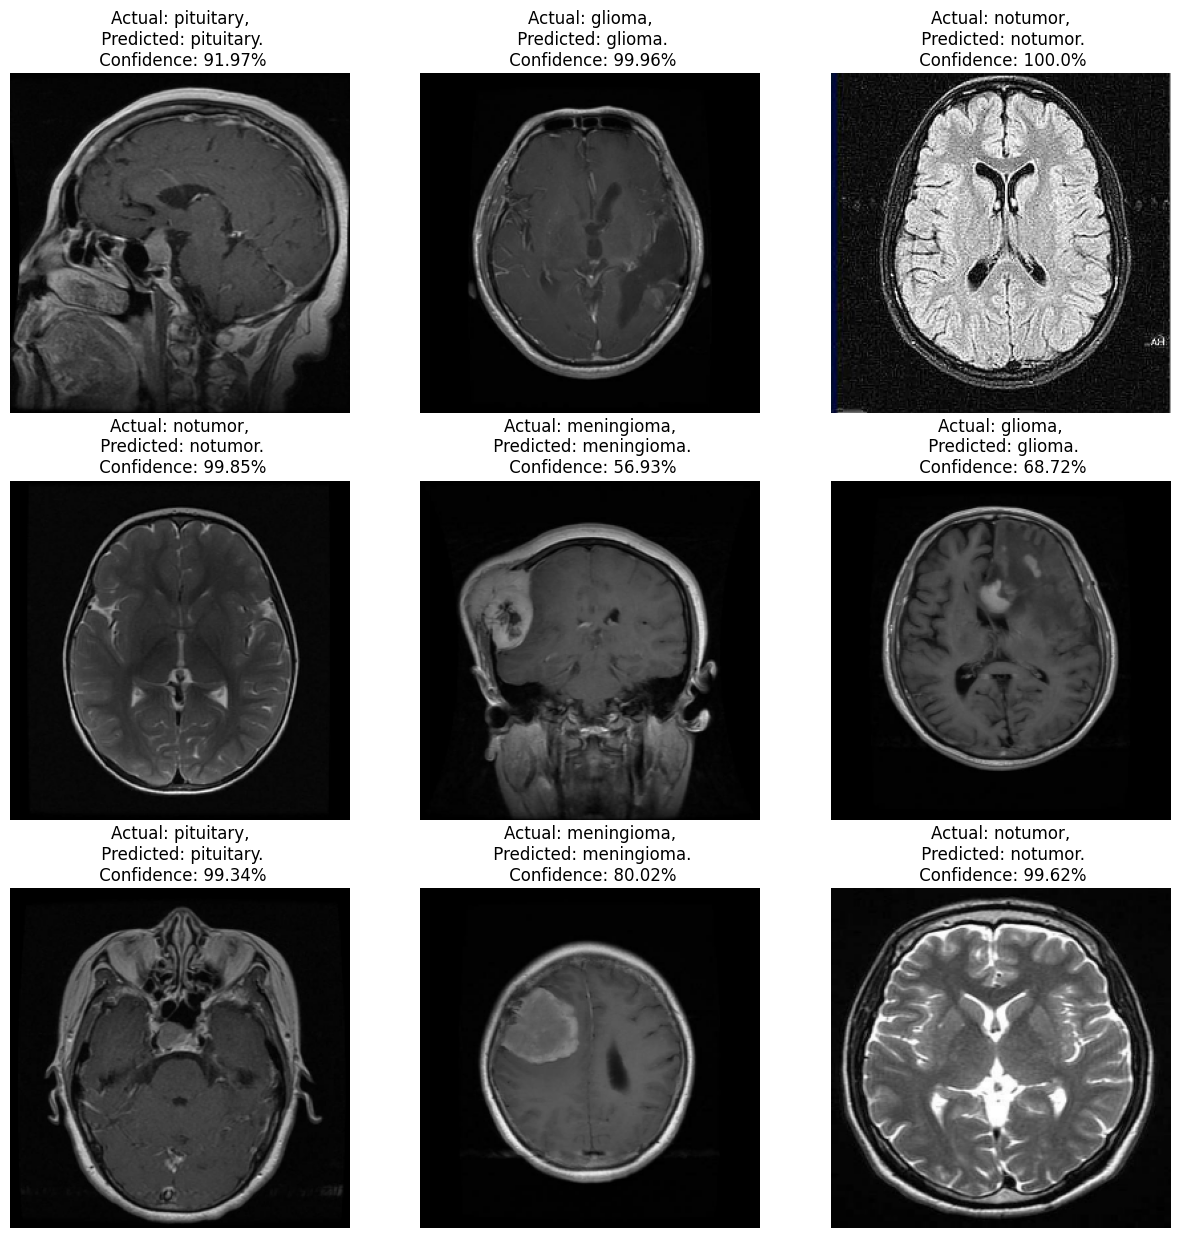

In [105]:
plt.figure(figsize=(15,15))
for image,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))

        predicted_class,confidence = predict(model,image[i].numpy())
        actual_class = class_name[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")